## **Ejercicio 2**

### **Teoría**

1. Describa cómo los bucles de retroalimentación crean:
    - **Crecimiento exponencial (bucle de refuerzo)**:
        - Un bucle de refuerzo ocurre cuando un cambio inicial se amplifica a través del tiempo. En este tipo de bucle, el efecto de una acción refuerza la causa que lo originó, lo que lleva a un crecimiento acelerado que eventualmente se describe como **exponencial**.
        - Ejemplo: En una epidemia, a mayor número de infectados, más oportunidades hay de contagiar a personas susceptibles, lo cual incrementa aún más el número de infectados. Este ciclo de contagio creciente forma un bucle positivo que puede producir crecimiento exponencial de casos.
    - **Equilibrio (bucle de equilibrio)**
        - Un bucle de equilibrio o retroalimentación negativa tiende a reducir desviaciones y estabilizar el sistema. A diferencia del refuerzo, este bucle actúa como un freno ante los cambios excesivos.
        - Ejemplo: Siguiendo el mismo ejemplo de l epidemia, a medida que más personas se recuperan, el número de infectados disminuye, lo que ralentiza el contagio. El sistema tiende así hacia un estado de equilibrio, autorregulándose de manera natural.



2. Analice el modelo epidémico SIR:
    - Etiquete todos los stocks/flujos del sistema.

<center>

| Elemento | Tipo  | Descripción                          |
|----------|-------|--------------------------------------|
| **S(t)** | Stock | Personas susceptibles (aún sanas)    |
| **I(t)** | Stock | Personas infectadas                  |
| **R(t)** | Stock | Personas recuperadas o inmunes       |
| **βSI**  | Flujo | Tasa de nuevas infecciones           |
| **γI**   | Flujo | Tasa de recuperación                 |
| **νS**   | Flujo | Tasa de vacunación                   |

</center>

- Ejemplo:
    - **Flujo de infección:** va desde **S → I**
    - **Flujo de recuperación:** va desde **I → R**
    - **Flujo de vacunación:** va desde **S → R**

- Identifique los bucles de retroalimentación que rigen la propagación de la infección.
    1. **Bucle de Refuerzo (positivo)**  
        - A más infectados, más contagios → se retroalimenta el crecimiento de infecciones.  
        - Bucle: `I ➝ βSI ➝ más I`

    2. **Bucle de Equilibrio (negativo)**  
        - A medida que los infectados se recuperan, la infección se reduce.  
        - También, menos susceptibles implica menos nuevos contagios.  
        - Bucle: `S disminuye ➝ βSI disminuye ➝ I deja de crecer`

3. Explique por qué los sistemas no lineales (p. ej., Flujo= βSI) requiere simulación numérica
    
    Los **sistemas lineales** presentan relaciones proporcionales simples entre causa y efecto. Si se duplica una entrada, la salida también se duplica.

    En contraste, los **sistemas no lineales** como el modelo SIR no cumplen esta proporcionalidad. En el término 
    βSI, el flujo de infección depende del producto entre susceptibles e infectados, dos variables que cambian dinámicamente en el tiempo. Esto genera comportamientos impredecibles y altamente sensibles a pequeñas variaciones iniciales. Además, estos sistemas contienen bucles de retroalimentación, donde las salidas (como los contagios) afectan las entradas futuras (como los susceptibles), lo que incrementa la complejidad del sistema.

    Por estas razones, los modelos no lineales no pueden resolverse con fórmulas cerradas y requieren simulación numérica, como el método de Euler, para aproximar su comportamiento en el tiempo.



### **Práctica**

Modele una epidemia con vacunación utilizando el marco SIR.
Instrucciones
1. Analice el modelo epidémico SIR:
    - Stocks: Susceptibles (S), Infectados (I), Recuperados (R)
    - Flujos: Infección (βSI), Recuperación (γI), Vacunación (vS)
    - Parámetros: β = 0,3, γ = 0,1, v = 0,05
2. Requisitos:
    - Simular durante 180 días con Δt = 0.5 días
    - Gráficar S(t), I(t) y R(t) a lo largo del tiempo.
    - Variar v (de 0 a 0,1) y describir su impacto en el pico de infecciones.

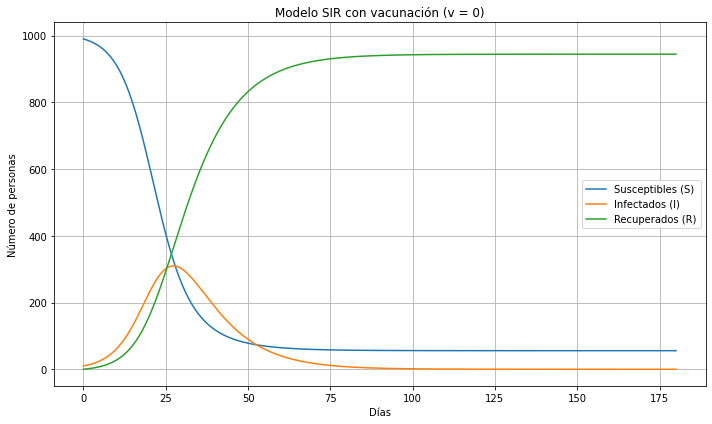

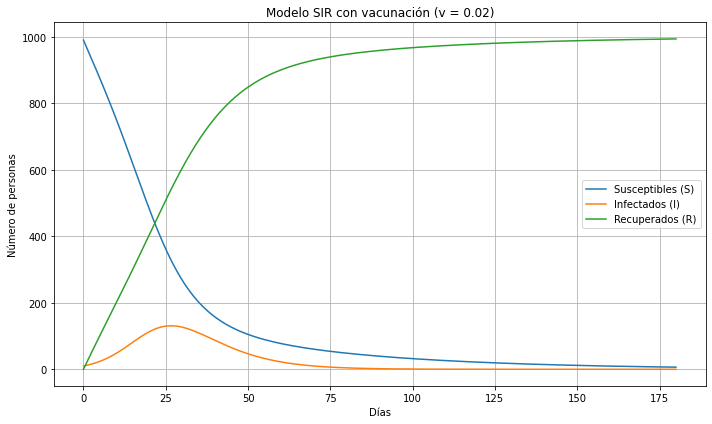

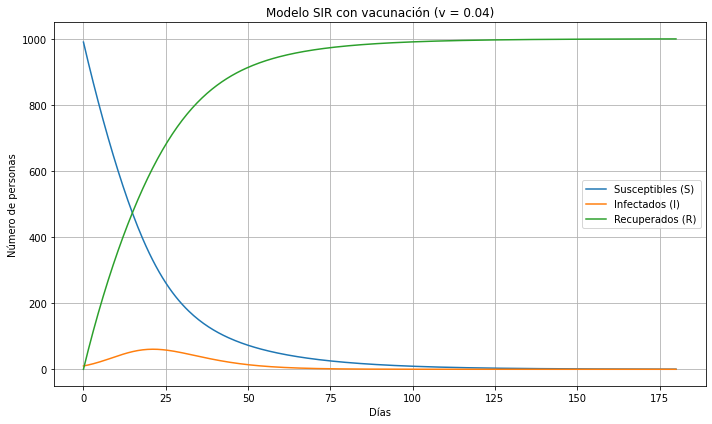

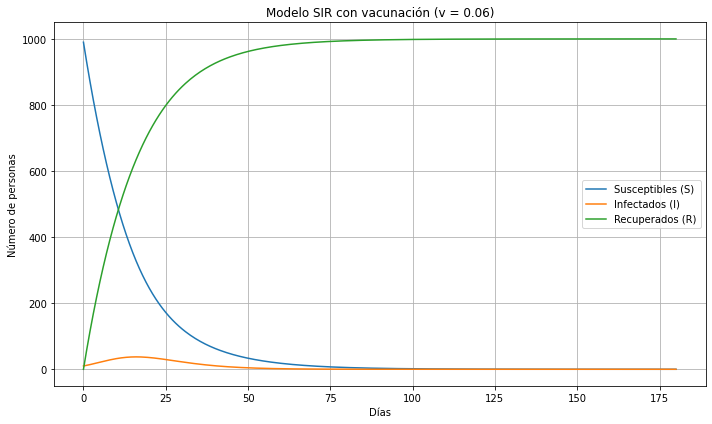

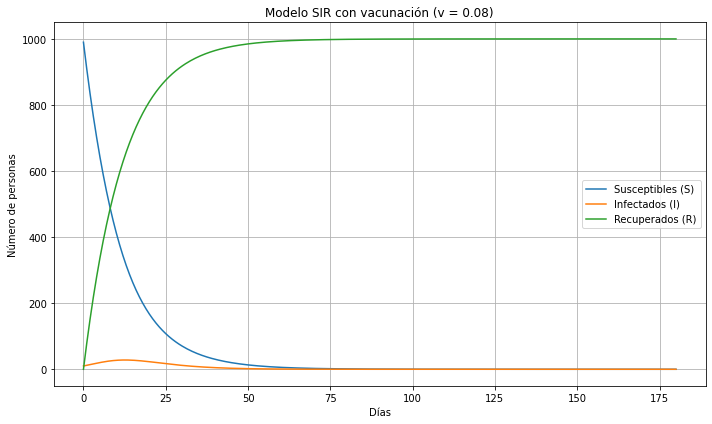

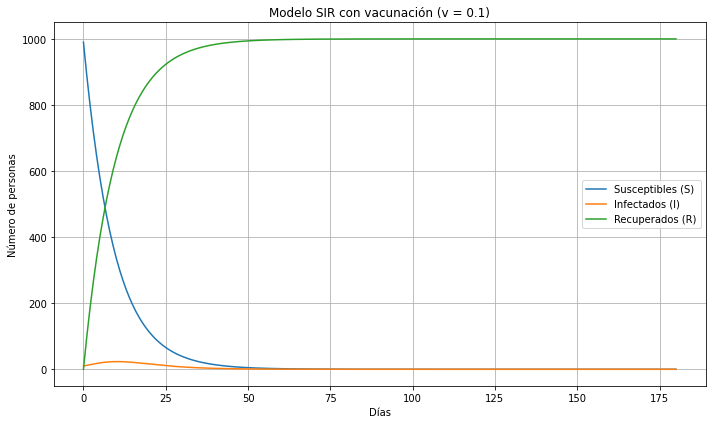

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
beta = 0.3     # Tasa de infección
gamma = 0.1    # Tasa de recuperación
delta_t = 0.5  # Paso de tiempo en días
dias = 180     # Duración de la simulación

# Condiciones iniciales
S0 = 990
I0 = 10
R0 = 0
N = S0 + I0 + R0

# Valores de vacunación a simular
valores_v = [0, 0.02, 0.04, 0.06, 0.08, 0.1]

# Simulación para cada valor de v
for v in valores_v:
    tiempo = np.arange(0, dias + delta_t, delta_t)
    n_pasos = len(tiempo)

    S = np.zeros(n_pasos)
    I = np.zeros(n_pasos)
    R = np.zeros(n_pasos)

    S[0] = S0
    I[0] = I0
    R[0] = R0

    for t in range(1, n_pasos):
        S_prev, I_prev, R_prev = S[t-1], I[t-1], R[t-1]

        infeccion = beta * S_prev * I_prev / N
        recuperacion = gamma * I_prev
        vacunacion = v * S_prev

        dS = -infeccion - vacunacion
        dI = infeccion - recuperacion
        dR = recuperacion + vacunacion

        S[t] = S_prev + dS * delta_t
        I[t] = I_prev + dI * delta_t
        R[t] = R_prev + dR * delta_t

    plt.figure(figsize=(10, 6))
    plt.plot(tiempo, S, label='Susceptibles (S)')
    plt.plot(tiempo, I, label='Infectados (I)')
    plt.plot(tiempo, R, label='Recuperados (R)')
    plt.title(f'Modelo SIR con vacunación (v = {v})')
    plt.xlabel('Días')
    plt.ylabel('Número de personas')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()







3. Considere y responda
    - ¿Cómo altera la vacunación los ciclos de retroalimentación?
        - La vacunación altera significativamente los ciclos de retroalimentación del modelo SIR. En ausencia de vacunación, el sistema presenta un bucle de refuerzo positivo, en el cual un aumento en el número de personas infectadas provoca más contagios, lo que a su vez genera un crecimiento acelerado del número de infectados. Sin embargo, al introducir la vacunación mediante el flujo νS, se reduce directamente la cantidad de personas susceptibles, disminuyendo la probabilidad de contagio sin necesidad de que estas pasen por la infección. Esto debilita el ciclo de refuerzo y fortalece el bucle de equilibrio negativo, ya que el sistema tiende a estabilizarse más rápidamente. En las simulaciones realizadas, se observa que a mayor tasa de vacunación, menor es el pico de infectados, y la curva de I(t) se aplana más temprano. Por lo tanto, la vacunación actúa como un mecanismo de control que rompe la cadena de retroalimentación positiva y acelera la autorregulación del sistema.

    - ¿Cuál es el valor mínimo de v para prevenir un brote?
        - Las gráficas generadas muestran con claridad que cuando ν=0, el número de infectados alcanza un pico muy elevado, cercano a las 330 personas. A medida que la tasa de vacunación aumenta, el brote se vuelve menos intenso. Con ν=0.02 y ν=0.04, el pico se reduce pero aún se presenta un brote epidémico visible. Es a partir de ν=0.06 que la curva de infectados se mantiene siempre baja, y el brote no llega a desarrollarse de manera significativa. Para valores de ν=0.08 y ν=0.1, la infección casi no se propaga, y el sistema se estabiliza rápidamente. En base a estos resultados, se concluye que el valor mínimo de ν necesario para evitar un brote importante es aproximadamente **0.06**. Este valor representa el umbral a partir del cual la vacunación es lo suficientemente efectiva como para mantener el número de infectados bajo control desde el inicio de la epidemia. 

#### **Prompt utilizado**

Estoy trabajando en un modelo SIR con vacunación en Python. Necesito un bloque base de código que simule durante n cantidad de días usando Δt = 0.5, y que permita incluir la vacunación como un término adicional. Quiero que el modelo sea flexible para probar distintos valores de v y que grafique los resultados para poder analizarlos después. No necesito explicaciones, solo una estructura clara que pueda ir ajustando.

#### **Por qué funcionó este prompt**

Este prompt me permitió obtener una estructura general sobre la cual trabajar. No buscaba una solución final al problema, sino un punto de partida que incluyera los elementos clave del modelo (infección, recuperación, vacunación) y fuera fácilmente modificable. La indicación de no incluir explicaciones fue intencional para que el resultado fuera limpio y enfocado en el código.

#### **Análisis de la solución**

A partir del bloque base generado, realicé varios ajustes manuales para adaptarlo a los requerimientos específicos del ejercicio. Por ejemplo, ajusté la inicialización de las variables, añadí bucles para variar la tasa de vacunación, mejoré la forma en la que se realizaba el cálculo de las tasas de cambio de los flujos, y agregué una visualización comparativa del pico de infectados. 




### **Prompt para generación inicial del código - (chatgpt)**
```txt
Dame el código inicial para modelar una epidemia con vacunación utilizando el marco SIR.
Que incluya los siguientes elementos:
    - Stocks: Susceptibles (S), Infectados (I), Recuperados (R)
    - Flujos: Infección (βSI), Recuperación (γI), Vacunación (vS)
    - Parámetros: β = 0,3, γ = 0,1, v = 0,05
```

### **Referencias**

1. Bianco, M. J., Cruz, P. D., Fraquelli, A. D., & Gache, A. L. (2020). MODELO EPIDEMIOLOGICO SIR: UNA APLICACIÓN DE LAS ECUACIONES DIFERENCIALES AL SARS-CoV2(COVID-19). Recuperado 23 de julio de 2025, de https://www.economicas.uba.ar/investigacion/wp-content/uploads/Gache-Andrea-.pdf

2. Feedback loops. (s. f.). https://www.sfu.ca/complex-systems-frameworks/frameworks/strategies/feedback-loops.html

3. Irwin, M., & Wang, Z. (2017). Dynamic Systems Modeling. The International Encyclopedia Of Communication Research Methods, 1-12. https://doi.org/10.1002/9781118901731.iecrm0074

